# La Crime Analyzer

### Import librerie

In [32]:
import requests # Per fare le richieste HTTP
import csv # Per leggere e salvare i file CSV
import pandas as pd # Per manipolare i dati
import matplotlib.pyplot as plt # Per plottare i grafici
import calendar # Per la gestione delle date
import folium # Per la gestione della mappa

### Creo una classe CrimeAnalyzer

In [33]:
class CrimeAnalyzer:
        def __init__(self, url, path, report_path):
            self.url = url
            self.path = path
            self.report_path = report_path
            self.crimes = None

## Definisco i vari metodi

### Funzione che scarica il file csv con requests

In [34]:
class CrimeAnalyzer:    
    def download_csv(self):
        response = requests.get(self.url) # Invio richiesta al server
        lines = response.text.strip().split('\n') # Prendo la risposta del server e la sostituisco da stringa a lista
        data = csv.reader(lines) # Creo un oggetto csv che legge la lista
            
        # Apro il file in scrittura
        with open(self.path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(data)

### Creiamo il dataframe

In [35]:
class CrimeAnalyzer:    
    def read_data(self):
        self.crimes = pd.read_csv(self.path)

### Puliamo i dati

In [36]:
def clean_data(self):
        
        nuove_colonne_diz = {
            'DR_NO': 'ID',
            'Date Rptd': 'Data Segn',
            'DATE OCC': 'Data Avv',
            'TIME OCC': 'Ora Avv',
            'AREA': 'Zona',
            'AREA NAME': 'Nome Zona',
            'Rpt Dist No': 'Distr Num Segn ',
            'Part 1-2': 'Part 1-2',
            'Crm Cd': 'Tipo Crimine Numero',
            'Crm Cd Desc': 'Tipo Crimine Desc',
            'Mocodes': 'Modus Operandi',
            'Vict Age': 'Eta Vittima',
            'Vict Sex': 'Sesso Vittima',
            'Vict Descent': 'Etnia Vittima',
            'Premis Cd': 'Premessa Numero',
            'Premis Desc': 'Premessa Desc',
            'Weapon Used Cd': 'Arma Usata Numero',
            'Weapon Desc': 'Arma Usata Desc',
            'Status': 'Stato',
            'Status Desc': 'Stato Desc',
            'Crm Cd 1': 'Codice Crimine 1',
            'Crm Cd 2': 'Codice Crimine 2',
            'Crm Cd 3': 'Codice Crimine 3',
            'Crm Cd 4': 'Codice Crimine 4',
            'LOCATION': 'Luogo',
            'Cross Street': 'Strada',
            'LAT': 'LAT',
            'LON': 'LON'
        }

        self.crimes = self.crimes.rename(columns=nuove_colonne_diz)
        self.crimes["Etnia Vittima"] = self.crimes["Etnia Vittima"].replace(["H","W","B","O","A","X","K","F","C","J","V","I","Z","P","U","D","G","L","S"],["Ispanico","Caucasico","Di colore","Altro","Asiatico","Sconosciuto","Koreano","Filippino","Cinese","Giapponese","Vietnamita","Nativo Americano","Isolano del Pacifico","Isolano del Pacifico - Samoano","Hawaiano","Cambogiano","Guamaniano","Laotiano","Indo-asiatico"])
        self.crimes = self.crimes[self.crimes['Eta Vittima'] != 0]
        self.crimes['Sesso Vittima'] = self.crimes['Sesso Vittima'].replace(['H', 'X'], 'Other')

### Esploriamo il Dataframe

In [37]:
class CrimeAnalyzer:  
    def print_data_info(self):
        print(self.crimes.head())
        print(self.crimes.columns)
        print(self.crimes.shape)
        print(self.crimes.dtypes)

### Mostriamo i tipi di crimini più frequenti

In [38]:
class CrimeAnalyzer:    
    def analyze_crime_frequency(self):
        print("Drequenza Crimini")
        crime_frequency = self.crimes['Tipo Crimine Desc'].value_counts()
        print(crime_frequency)

### Analisi temporale dei crimini

In [39]:
class CrimeAnalyzer:
    def analyze_temporal_data(self):
        # Trasformiamo la data nel formato %m/%d/%Y %I:%M:%S %p
        self.crimes['Data Segn'] = pd.to_datetime(self.crimes['Data Segn'], format='%m/%d/%Y %I:%M:%S %p')
         
        # Estraiamo il mese e salviamo nella colonna "Mese"
        self.crimes['Mese'] = self.crimes['Data Segn'].dt.month
        
        # Contiamo i valori unici in "Mese" e li ordiniamo
        monthly_crime_count = self.crimes['Mese'].value_counts().sort_index()
        
        # Uso una list comprehension per trasformare i mesi da numeri a string
        month_names = [calendar.month_name[i] for i in range(1, 13)] 
        
        # Assegniamo la lista dei mesi all'indice al posto dei numeri
        monthly_crime_count.index = month_names

        monthly_crime_count.plot(kind='bar', xlabel='Mese', ylabel='Numero di Crimini')
        plt.show()

### Analisi demografica sulle vittime

In [40]:
class CrimeAnalyzer:
    def analyze_victim_demographics(self):
        victim_age_distribution = self.crimes['Eta Vittima'].plot.hist(bins=20)
        plt.xlabel('Età')
        plt.ylabel('Frequenza')
        plt.title("Distribuzione dell' età delle vittime")
        plt.show()

        victim_gender_distribution = self.crimes['Sesso Vittima'].value_counts()
        print(victim_gender_distribution)

### Analisi sullo stato dei crimini (In corso/Arresto/Altro)

In [41]:
class CrimeAnalyzer:
    def analyze_crime_status(self):
        crime_status_distribution = self.crimes['Stato Desc'].value_counts()
        print(crime_status_distribution)

### Analisi contestuale

In [42]:
class CrimeAnalyzer:
    def analyze_premise_and_weapon(self):
        premise_distribution = self.crimes['Premessa Desc'].value_counts()
        print(premise_distribution)

        weapon_distribution = self.crimes['Arma Usata Desc'].value_counts()
        print(weapon_distribution)

### Analisi età media in base alla tipologia di crimine

In [43]:
class CrimeAnalyzer:
    def analyze_crime_vs_age(self):
        crime_vs_age = self.crimes.groupby('Tipo Crimine Desc')['Eta Vittima'].mean()
        print(crime_vs_age)

### Analisi del Genere delle vittime

In [44]:
class CrimeAnalyzer:
    def analyze_victim_gender_distribution(self):
            sex_counts = self.crimes['Sesso Vittima'].value_counts()

            labels = sex_counts.index
            counts = sex_counts.values

            plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
            plt.axis('equal')
            plt.title('Distribuzione del sesso delle vittime')
            plt.show()

## Analisi Etnia Vittime

In [45]:
class CrimeAnalyzer:
    def plot_ethnicity_histogram(self):
            etnia_count = self.crimes['Etnia Vittima'].value_counts()
            etnia_count.plot(kind='bar', xlabel='Etnia Vittima', ylabel='Numero di Crimini')
            plt.title('Distribuzione delle Etnie delle Vittime')
            plt.show()

### Analisi geografica

In [46]:
class CrimeAnalyzer:
    def plot_crime_map(self):
        
        # Filtriamo le righe con valori mancanti per la latitudine e la longitudine
        locations = self.crimes[['LAT', 'LON']].dropna()

        # Scegliamo un sottoinsieme di 100 righe
        subset = locations.head(100)

        # Creiamo una mappa centrata su Los Angeles
        crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=13)

        # Aggiungiamo i punti alla mappa
        for _, crime in subset.iterrows():
            lat, lon = crime['LAT'], crime['LON']
            folium.Marker(location=[lat, lon]).add_to(crime_map)

        # Salviamo la mappa come file html
        crime_map.save('data/crime_map.html')

### Creazione file di report

In [47]:
class CrimeAnalyzer: 
    def report_file(self):
        
        #impostazione di visualizzazione massima righe
        pd.set_option('display.max_rows', None)
        
        report_data = {
            'Distribuzione Sesso Vittime': self.crimes['Sesso Vittima'].value_counts(),
            'Distribuzione Stato dei crimini': self.crimes['Stato Desc'].value_counts(),
            'Distribuzione delle premesse': self.crimes['Premessa Desc'].value_counts(),
            'Distribuzione Armi Usate': self.crimes['Arma Usata Desc'].value_counts()
        }

        with open(self.report_path, 'w') as file:
            for section, data in report_data.items():
                file.write(f'{section}:\n')
                file.write(f'{data}\n\n')

        print(f"Creato il file di report: {self.report_path}")

### Richiamiamo tutti i metodi per elaborare i dati

In [48]:
class CrimeAnalyzer:
    def process_data(self):
        self.download_csv()
        self.read_data()
        self.clean_data()
        self.print_data_info()
        self.analyze_crime_frequency()
        self.analyze_temporal_data()
        self.analyze_victim_demographics()
        self.analyze_crime_status()
        self.analyze_premise_and_weapon()
        self.analyze_crime_vs_age()
        self.analyze_victim_gender_distribution()
        self.plot_ethnicity_histogram()
        self.plot_crime_map()
        self.report_file()

## Classe completa

In [49]:
class CrimeAnalyzer:
    # Definisco il costruttore
    def __init__(self, url, path, report_path):
        self.url = url
        self.path = path
        self.report_path = report_path
        self.crimes = None
        
    # Definisco i metodi
    
    def download_csv(self):
        response = requests.get(self.url) # Invio richiesta al server
        lines = response.text.strip().split('\n') # Prendo la risposta del server e la sostituisco da stringa a lista
        data = csv.reader(lines) # Creo un oggetto csv che legge la lista
        
        # Apro il file in scrittura
        with open(self.path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerows(data)

    def read_data(self):
        self.crimes = pd.read_csv(self.path)

    # Pulisco i dati
    def clean_data(self):
        
        nuove_colonne_diz = {
            'DR_NO': 'ID',
            'Date Rptd': 'Data Segn',
            'DATE OCC': 'Data Avv',
            'TIME OCC': 'Ora Avv',
            'AREA': 'Zona',
            'AREA NAME': 'Nome Zona',
            'Rpt Dist No': 'Distr Num Segn ',
            'Part 1-2': 'Part 1-2',
            'Crm Cd': 'Tipo Crimine Numero',
            'Crm Cd Desc': 'Tipo Crimine Desc',
            'Mocodes': 'Modus Operandi',
            'Vict Age': 'Eta Vittima',
            'Vict Sex': 'Sesso Vittima',
            'Vict Descent': 'Etnia Vittima',
            'Premis Cd': 'Premessa Numero',
            'Premis Desc': 'Premessa Desc',
            'Weapon Used Cd': 'Arma Usata Numero',
            'Weapon Desc': 'Arma Usata Desc',
            'Status': 'Stato',
            'Status Desc': 'Stato Desc',
            'Crm Cd 1': 'Codice Crimine 1',
            'Crm Cd 2': 'Codice Crimine 2',
            'Crm Cd 3': 'Codice Crimine 3',
            'Crm Cd 4': 'Codice Crimine 4',
            'LOCATION': 'Luogo',
            'Cross Street': 'Strada',
            'LAT': 'LAT',
            'LON': 'LON'
        }

        self.crimes = self.crimes.rename(columns=nuove_colonne_diz)
        self.crimes["Etnia Vittima"] = self.crimes["Etnia Vittima"].replace(["H","W","B","O","A","X","K","F","C","J","V","I","Z","P","U","D","G","L","S"],["Ispanico","Caucasico","Di colore","Altro","Asiatico","Sconosciuto","Koreano","Filippino","Cinese","Giapponese","Vietnamita","Nativo Americano","Isolano del Pacifico","Isolano del Pacifico - Samoano","Hawaiano","Cambogiano","Guamaniano","Laotiano","Indo-asiatico"])
        self.crimes = self.crimes[self.crimes['Eta Vittima'] != 0]
        self.crimes['Sesso Vittima'] = self.crimes['Sesso Vittima'].replace(['H', 'X'], 'Other')

    # Stampo le informazioni del Dataframe
    def print_data_info(self):
        print(self.crimes.head())
        print(self.crimes.columns)
        print(self.crimes.shape)
        print(self.crimes.dtypes)

    def analyze_crime_frequency(self):
        print("Drequenza Crimini")
        crime_frequency = self.crimes['Tipo Crimine Desc'].value_counts()
        print(crime_frequency)

    def analyze_temporal_data(self):
        # Trasformiamo la data nel formato %m/%d/%Y %I:%M:%S %p
        self.crimes['Data Segn'] = pd.to_datetime(self.crimes['Data Segn'], format='%m/%d/%Y %I:%M:%S %p')
         
        # Estraiamo il mese e salviamo nella colonna "Mese"
        self.crimes['Mese'] = self.crimes['Data Segn'].dt.month
        
        # Contiamo i valori unici in "Mese" e li ordiniamo
        monthly_crime_count = self.crimes['Mese'].value_counts().sort_index()
        
        # Uso una list comprehension per trasformare i mesi da numeri a string
        month_names = [calendar.month_name[i] for i in range(1, 13)] 
        
        # Assegniamo la lista dei mesi all'indice al posto dei numeri
        monthly_crime_count.index = month_names

        monthly_crime_count.plot(kind='bar', xlabel='Mese', ylabel='Numero di Crimini')
        plt.show()

    def analyze_victim_demographics(self):
        victim_age_distribution = self.crimes['Eta Vittima'].plot.hist(bins=20)
        plt.xlabel('Età')
        plt.ylabel('Frequenza')
        plt.title("Distribuzione dell' età delle vittime")
        plt.show()

        victim_gender_distribution = self.crimes['Sesso Vittima'].value_counts()
        print(victim_gender_distribution)

    def analyze_crime_status(self):
        crime_status_distribution = self.crimes['Stato Desc'].value_counts()
        print(crime_status_distribution)

    def analyze_premise_and_weapon(self):
        premise_distribution = self.crimes['Premessa Desc'].value_counts()
        print(premise_distribution)

        weapon_distribution = self.crimes['Arma Usata Desc'].value_counts()
        print(weapon_distribution)

    def analyze_crime_vs_age(self):
        crime_vs_age = self.crimes.groupby('Tipo Crimine Desc')['Eta Vittima'].mean()
        print(crime_vs_age)

    def analyze_victim_gender_distribution(self):
        sex_counts = self.crimes['Sesso Vittima'].value_counts()

        labels = sex_counts.index
        counts = sex_counts.values

        plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title('Distribuzione del sesso delle vittime')
        plt.show()
        
        
    def plot_crime_map(self):
        
        # Filtriamo le righe con valori mancanti per la latitudine e la longitudine
        locations = self.crimes[['LAT', 'LON']].dropna()

        # Scegliamo un sottoinsieme di 100 righe
        subset = locations.head(100)

        # Creiamo una mappa centrata su Los Angeles
        crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=13)

        # Aggiungiamo i punti alla mappa
        for _, crime in subset.iterrows():
            lat, lon = crime['LAT'], crime['LON']
            folium.Marker(location=[lat, lon]).add_to(crime_map)

        # Salviamo la mappa come file html
        crime_map.save('data/crime_map.html')
        
        
        
    def plot_ethnicity_histogram(self):
        etnia_count = self.crimes['Etnia Vittima'].value_counts()
        etnia_count.plot(kind='bar', xlabel='Etnia Vittima', ylabel='Numero di Crimini')
        plt.title('Distribuzione delle Etnie delle Vittime')
        plt.show()
  

    def report_file(self):
        
        #impostazione di visualizzazione massima righe
        pd.set_option('display.max_rows', None)
        
        report_data = {
            'Distribuzione Sesso Vittime': self.crimes['Sesso Vittima'].value_counts(),
            'Distribuzione Stato dei crimini': self.crimes['Stato Desc'].value_counts(),
            'Distribuzione delle premesse': self.crimes['Premessa Desc'].value_counts(),
            'Distribuzione Armi Usate': self.crimes['Arma Usata Desc'].value_counts()
        }

        with open(self.report_path, 'w') as file:
            for section, data in report_data.items():
                file.write(f'{section}:\n')
                file.write(f'{data}\n\n')

        print(f"Creato il file di report: {self.report_path}")

    
    # Richiamiamo i metodi per elaborare i dati
    def process_data(self):
        self.download_csv()
        self.read_data()
        self.clean_data()
        self.print_data_info()
        self.analyze_crime_frequency()
        self.analyze_temporal_data()
        self.analyze_victim_demographics()
        self.analyze_crime_status()
        self.analyze_premise_and_weapon()
        self.analyze_crime_vs_age()
        self.analyze_victim_gender_distribution()
        self.plot_ethnicity_histogram()
        self.plot_crime_map()
        self.report_file()

### Istanziamo la classe CrimeAnalyzer

In [50]:
url = 'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'
path = 'data/crimes.csv'
report_path = 'data/crime_report.txt'
analyzer = CrimeAnalyzer(url, path, report_path)

## Richiamiamo i metodi

In [51]:
analyzer.download_csv()

In [52]:
analyzer.read_data()

In [53]:
analyzer.clean_data()

In [54]:
analyzer.print_data_info()

          ID               Data Segn                Data Avv  Ora Avv  Zona  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM     2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM      330     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM     1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      415    19   
5  200100501  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       30     1   

     Nome Zona  Distr Num Segn   Part 1-2  Tipo Crimine Numero  \
0    Southwest              377         2                  624   
1      Central              163         2                  624   
3  N Hollywood             1543         2                  745   
4      Mission             1998         2                  740   
5      Central              163         1                  121   

                                   Tipo Crimine Desc  ... Stato   Stato Desc  \
0                           BATTERY - SIMPLE ASS

In [55]:
analyzer.analyze_crime_frequency()

Drequenza Crimini
BATTERY - SIMPLE ASSAULT                                    58877
THEFT OF IDENTITY                                           47798
BURGLARY FROM VEHICLE                                       45140
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              41508
INTIMATE PARTNER - SIMPLE ASSAULT                           37571
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     34789
THEFT PLAIN - PETTY ($950 & UNDER)                          33436
BURGLARY                                                    31372
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         26230
ROBBERY                                                     20802
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    19621
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    16435
CRIMINAL THREATS - NO WEAPON DISPLAYED                      15133
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             13324
BRANDISH WEAPON                                           

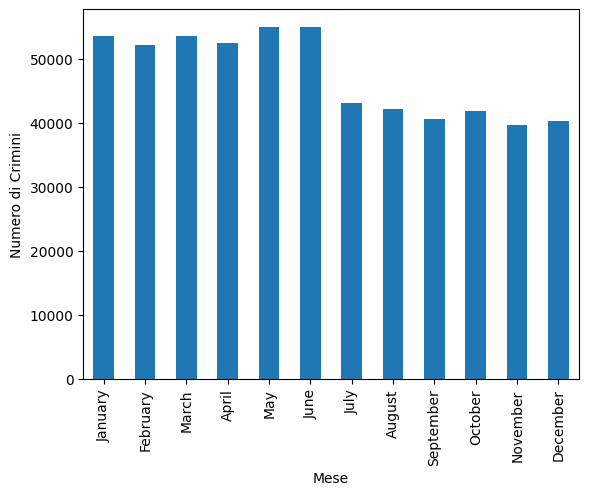

In [56]:
analyzer.analyze_temporal_data()

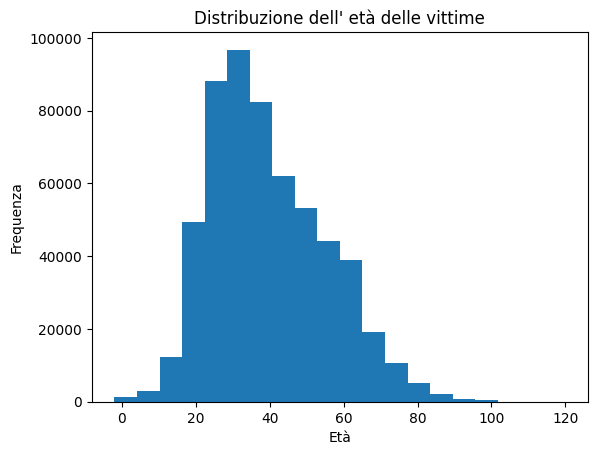

M        287122
F        275180
Other      6926
Name: Sesso Vittima, dtype: int64


In [57]:
analyzer.analyze_victim_demographics()

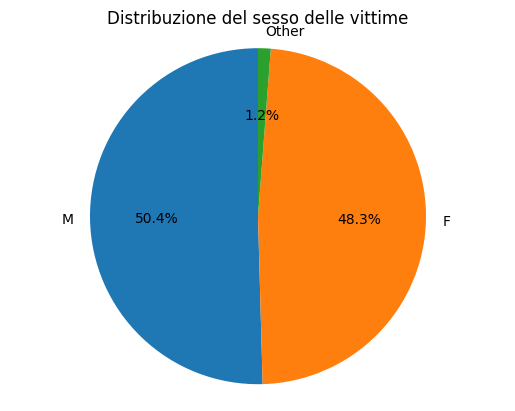

In [58]:
analyzer.analyze_victim_gender_distribution()

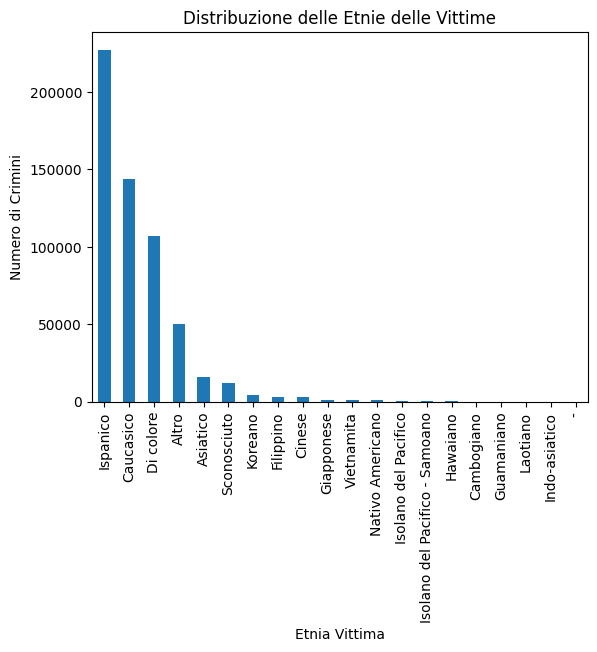

In [59]:
analyzer.plot_ethnicity_histogram()

In [60]:
analyzer.analyze_crime_status()

Invest Cont     440021
Adult Other      74484
Adult Arrest     51802
Juv Arrest        1860
Juv Other         1087
UNK                  3
Name: Stato Desc, dtype: int64


In [61]:
analyzer.analyze_premise_and_weapon()

SINGLE FAMILY DWELLING                                             125444
STREET                                                             104720
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)                        88243
PARKING LOT                                                         36767
SIDEWALK                                                            30495
VEHICLE, PASSENGER/TRUCK                                            21312
OTHER BUSINESS                                                      17695
GARAGE/CARPORT                                                      11602
DRIVEWAY                                                             9103
PARKING UNDERGROUND/BUILDING                                         5986
RESTAURANT/FAST FOOD                                                 5391
OTHER RESIDENCE                                                      4801
OTHER PREMISE                                                        4688
ALLEY                                 

In [62]:
analyzer.analyze_crime_vs_age()

Tipo Crimine Desc
ARSON                                                       45.117893
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                31.805430
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              38.036065
ATTEMPTED ROBBERY                                           39.049304
BATTERY - SIMPLE ASSAULT                                    40.659256
BATTERY ON A FIREFIGHTER                                    36.720588
BATTERY POLICE (SIMPLE)                                     31.533688
BATTERY WITH SEXUAL CONTACT                                 31.122307
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM    42.250000
BIGAMY                                                      34.333333
BIKE - ATTEMPTED STOLEN                                     46.200000
BIKE - STOLEN                                               36.109819
BLOCKING DOOR INDUCTION CENTER                              57.600000
BOMB SCARE                                                  37.614583
BR

In [63]:
analyzer.plot_crime_map()

In [64]:
analyzer.report_file()

Creato il file di report: data/crime_report.txt
